In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv', na_values=['NULL', 'PrivacySuppressed'], low_memory=False)
df.info()

(6543, 3214)

<Axes: title={'center': 'Net Tuition Revenue per FTE student (up to 99th percentile)'}, ylabel='Frequency'>

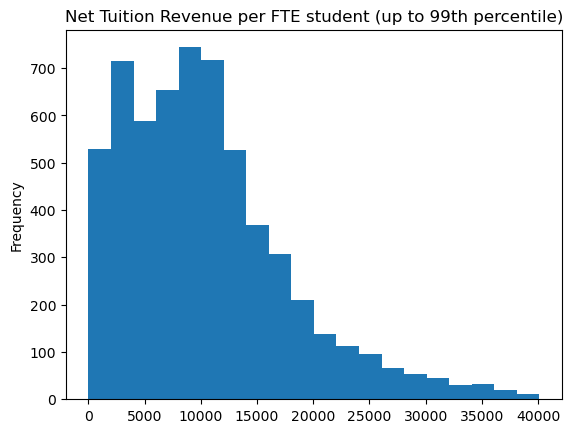

In [77]:
tuit_99_ptile = np.percentile(df.TUITFTE.dropna(), 99)
df[df.TUITFTE<=tuit_99_ptile].TUITFTE.plot.hist(bins=20, title='Net Tuition Revenue per FTE student (up to 99th percentile)')
# df.TUITFTE.describe()
# print(df.loc[df.TUITFTE>40000, 'INSTNM'].to_numpy())

count      6024.000000
mean       8759.862716
std       13306.209710
min           0.000000
25%        3854.500000
50%        6377.500000
75%        9894.500000
max      598759.000000
Name: INEXPFTE, dtype: float64

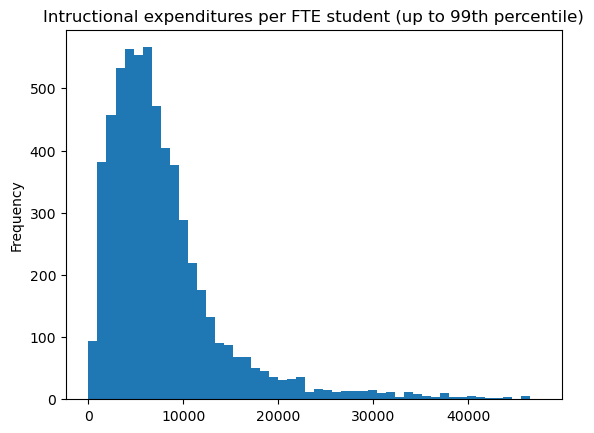

In [76]:
expend_99_ptile = np.percentile(df.INEXPFTE.dropna(), 99)
df[df.INEXPFTE<=expend_99_ptile].INEXPFTE.plot.hist(bins=50, title='Intructional expenditures per FTE student (up to 99th percentile)')
df.INEXPFTE.describe()
# df.loc[df.INEXPFTE>150000, 'INSTNM']
# expend_99_ptile

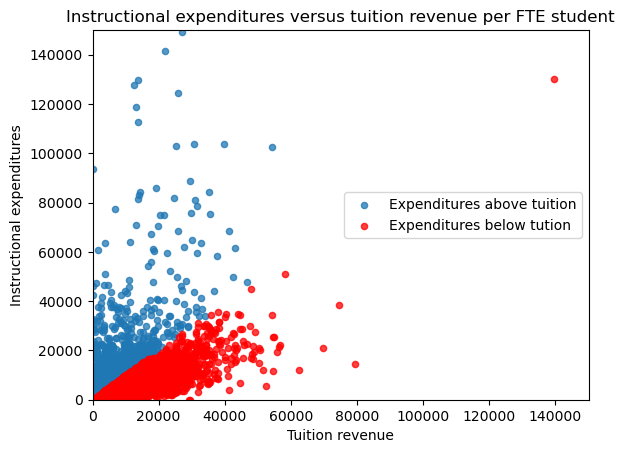

In [82]:
ax = df[df.INEXPFTE>df.TUITFTE].plot.scatter(
    x='TUITFTE', 
    y='INEXPFTE', 
    alpha=0.75, 
    label='Expenditures above tuition',
    title='Instructional expenditures versus tuition revenue per FTE student'
)
df[df.INEXPFTE<=df.TUITFTE].plot.scatter(
    x='TUITFTE', 
    y='INEXPFTE', 
    alpha=0.75, 
    ax=ax, 
    c='red', 
    label='Expenditures below tution',
    xlabel='Tuition revenue',
    ylabel='Instructional expenditures'
)
ax.legend()
# plt.plot(np.arange(200_000), np.arange(200_000), c='black');
ax.set_xlim(0,150_000)
ax.set_ylim(0,150_000);